# **Keras Model with Image Augmentation and Dropout to reduce overfitting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!rm -rf '/content/cats_vs_dogs_small'
!rm -rf '/content/dogs_cats'

In [24]:
!unzip -qq '/content/drive/MyDrive/Colab_Notebooks/SECONDYEAR_TRIMESTER4_Module03_deep-learning-applications/DAY3_APPLICATION_OF_DEEP_LEARNING/dogs_cats.zip'

In [25]:
import os, shutil, pathlib

original_dir = pathlib.Path("dogs_cats/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,dst=dir / fname)
  
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [26]:
from keras import layers
from keras import models

train_dir="/content/cats_vs_dogs_small/train"
validation_dir="/content/cats_vs_dogs_small/validation"

In [27]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

**Validation Data Set should not be augmented**

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

**Resize all images to 150x150**

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [32]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 21s 192ms/step - loss: 0.6951 - acc: 0.5020 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 20s 197ms/step - loss: 0.6884 - acc: 0.5310 - val_loss: 0.6690 - val_acc: 0.5610
Epoch 3/30
100/100 [==============================] - 21s 208ms/step - loss: 0.6765 - acc: 0.5715 - val_loss: 0.6906 - val_acc: 0.5390
Epoch 4/30
100/100 [==============================] - 19s 188ms/step - loss: 0.6689 - acc: 0.5865 - val_loss: 0.6498 - val_acc: 0.6080
Epoch 5/30
100/100 [==============================] - 24s 237ms/step - loss: 0.6603 - acc: 0.6025 - val_loss: 0.6426 - val_acc: 0.6170
Epoch 6/30
100/100 [==============================] - 21s 215ms/step - loss: 0.6462 - acc: 0.6250 - val_loss: 0.6254 - val_acc: 0.6480
Epoch 7/30
100/100 [==============================] - 19s 191ms/step - loss: 0.6419 - acc: 0.6150 - val_loss: 0.6175 - val_acc: 0.6250
Epoch 8/30
100/100 [==============================] - 2

In [33]:
model.save('cats_and_dogs_small_2.h5')

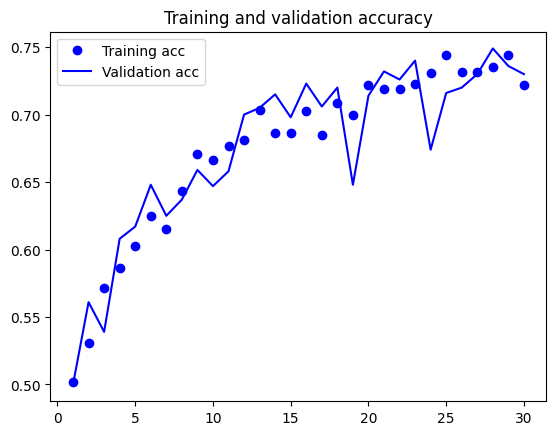

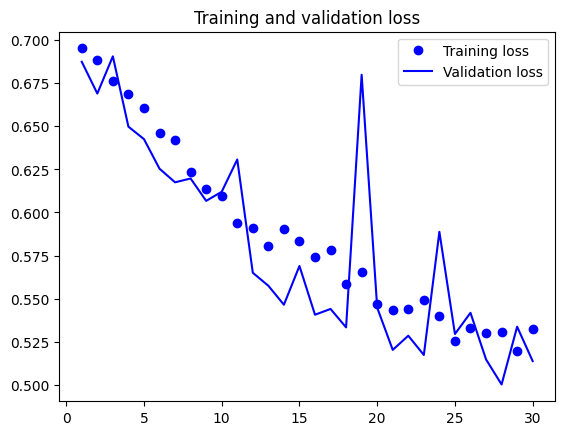

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
!jupyter nbconvert --to html keras_cats_dogs_convnet_augmented.ipynb